# Régulateur de tension série avec AOP

In the regulator presented in the previous section, a transistor was used as the control element. This time, the objective is to use an operational amplifier (op-amp) as the control element.

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import (
    Circuit, SubCircuitFactory
)
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.WaveForm import OperatingPoint

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Introduction to the Regulator

Before building our circuit, we first need to define the logical blocks that compose it. These blocks are illustrated in  [](bloc_logique_diode_zener_3_notebook).

```{figure} ./images/bloc_logique.svg
:name: bloc_logique_diode_zener_3_notebook
:align: center
:width: 500px

Logical blocks of a regulator
```

We can see that the regulator is made up of four logical blocks. The goal is to eventually construct an electronic circuit that performs voltage regulation.

## Electronic Circuit

The circuit that will be studied is shown in [](#regulateur_tension_serie_AOP):

```{figure} ./images/regulateur_tension_serie_AOP.svg
:name: regulateur_tension_serie_AOP
:align: center
:width: 500px

Régulateur de tension série avec un AOP
```

This circuit is very similar to the previous one. It still uses a Zener diode $D_1$ as the voltage reference, and the transistor $Q_1$ is responsible for supplying current to the load. Resistors $R_1$ and $R_2$ act as the sensing elements for the output voltage.

The major difference is the addition of an **operational amplifier (op-amp)**, which implements the **error detection and correction** function. In this architecture, the most important property is that the voltage difference between the op-amp’s (+) and (-) inputs is ideally **zero** (as long as the op-amp operates in its linear region).
Therefore, care must be taken to ensure that the op-amp remains properly biased and does not saturate.

```{danger}
The resistor $R_3$ is critical because it sets the current flowing through the Zener diode and therefore determines the power it must dissipate. Its value must be chosen so that the Zener operates in the middle of its regulation zone.
```

The main functional roles of each component are summarized in [](#regulateur_tension_serie_AOP_bloc).

```{figure} ./images/regulateur_tension_serie_AOP_bloc.svg
:name: regulateur_tension_serie_AOP_bloc
:align: center
:width: 500px

Series voltage regulator with an op-amp — block diagram
```

## Equations

### Output Voltage

$$U_\text{out} = \frac{U_{Z1}}{R_1} \cdot (R_1 + R_2)$$

Thus, the output voltage depends on the Zener diode voltage \(U_{Z1}\) and the resistors \(R_1\) and \(R_2\), allowing for more flexible and precise voltage regulation.

### Power Dissipated by the Transistor

$$P_{Q1} = U_{CE1} \cdot I_{E1}$$

```{attention}
Be careful with the op-amp's output voltage: it must remain within the linear operating region.  
Since the op-amp output must produce \(U_\text{out}\) plus the base–emitter voltage \(U_{BE1}\), the following condition must always be satisfied:

$$-V_\text{cc} < U_\text{out} + U_{BE1} < -V_\text{ee}$$
```

## Demonstration

We begin with the complete circuit used for the derivation, shown in [](#regulateur_tension_serie_AOP_demonstration) :

```{figure} ./images/regulateur_tension_serie_AOP_demonstration.svg
:name: regulateur_tension_serie_AOP_demonstration
:align: center
:width: 500px

Complete demonstration circuit for the voltage regulator
```

We now detail the derivation of all the electrical equations governing this simple Zener-transistor regulator.

### Calculating the Output Voltage

We begin by determining the reference voltage using the loop formed by $U_\text{in}$, $U_{R3}$, and $U_{Z1}$:

$$U_\text{in} = U_{R3} + U_{Z1}$$

Thus, the reference point is simply:

$$U_\text{ref} = U_{Z1}$$

According to the operating principles of an op-amp in its linear region, the input voltages satisfy:

$$V^+ = V^- \qquad \Rightarrow \qquad V^+ - V^- = 0$$

This allows us to write the voltage across resistor $R_1$ as:

$$U_{R1} = U_\text{ref}$$

Using Ohm’s law, the current through $R_1$ is:

$$I_{R1} = \frac{U_\text{ref}}{R_1}$$

Since the op-amp inputs have extremely high impedance, no significant current flows into them. Therefore:

$$I_{R1} = I_{R2}$$

We can now compute the voltage across $R_2$:

$$U_{R2} = R_2 \cdot I_{R2}$$

Finally, the output voltage is simply the sum of the voltages across $R_1$ and $R_2$:

$$U_\text{out} = U_{R2} + U_{R1}$$

Substituting the expression for $I_{R1}$:

$$U_\text{out} = (R_1 + R_2)\, I_{R1}$$

and using

$$I_{R1} = \frac{U_\text{ref}}{R_1},$$

we obtain:

$$U_\text{out} = (R_1 + R_2)\, \frac{U_\text{ref}}{R_1}$$

### Power Dissipated by Transistor $Q_1$

The power dissipated by the transistor is:

$$P_{Q1} = I_{E1} \cdot U_{CE1}$$

To compute $I_{E1}$, we apply Kirchhoff’s current law:

$$I_{E1} = I_{R2} + I_\text{out}$$

Since $I_{R2} = I_{R1}$, we obtain:

$$I_{E1} = I_{R1} + I_\text{out}$$

### Output Voltage at the Transistor

To determine the transistor’s base voltage, we add the op-amp output voltage to the base–emitter junction drop:

$$U_{B1} = U_\text{out} + U_{BE1}$$

It is important to ensure that the op-amp output voltage remains within its valid operating (non-saturated) range so that the regulator functions correctly.

Now, the goal is to run simulations on SPACE.

## Regulation Loop

In the diagram shown in [](#bloc_logique_diode_zener_3_notebook), we can see a section of the circuit that creates a feedback loop. This feedback mechanism is what transforms a merely stabilized system into a regulated one. The diagram in [](#regulateur_tension_serie_AOP_boucle_retro) illustrates this concept.

```{figure} ./images/regulateur_tension_serie_AOP_boucle_retro.svg
:name: regulateur_tension_serie_AOP_boucle_retro
:align: center
:width: 500px

Explanation of the feedback loop within the system
````

At first glance, the diagram in [](#regulateur_tension_serie_AOP_boucle_retro) may seem complex. However, when examined step by step, the operation of the feedback loop becomes much easier to understand.

Let us begin by considering what happens when the load resistance $R_L$ decreases. According to Ohm’s law $U = R \cdot I$, the output voltage $U_\text{out}$ also decreases.

Since $U_\text{out}$ decreases, the voltage across $R_1$, denoted $U_{R1}$, also decreases, because:

$$U_\text{out} = U_{R1} + U_{R2}$$

As a result, the voltage at the inverting input $v^{-}$ of the op-amp drops. The operational amplifier always acts to maintain $v^{+} = v^{-}$, so this decrease causes the op-amp to increase its output current in order to restore the balance.

This increased output drives more base current into the transistor, which in turn increases the emitter current. Consequently, the current flowing through the output resistor $R_\text{out}$ rises, and by Ohm’s law, this increase in current raises the output voltage—thus completing the regulation action.

```{caution}
This explanation still needs to be improved further, as some parts remain unclear.
```

```{note}
The opposite reasoning applies when the load resistance $R_L$ increases.
```


## SPICE Setup

The next objective is to implement this circuit in SPICE. Before writing the SPICE netlist, we use the following schematic:

```{figure} ./images/regulateur_tension_serie_AOP_SPACE.svg
:name: regulateur_tension_serie_AOP_SPACE
:align: center
:width: 500px

Simple voltage regulation circuit implemented in SPICE
```

Following this schematic, the SPICE code can be written as follows:

In [3]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Regulateur')

# Include required component libraries
circuit.include("lib/bjt.lib")
circuit.include("lib/zener.lib")
circuit.include('lib/UA741.sub')

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
V_in = 20 @ u_V                    # Input supply voltage [V]

circuit.V('in', 'collecteur', circuit.gnd, V_in)

# ------------------------------------------------------------
# Polarization tension
# ------------------------------------------------------------
V_polarization = 15
circuit.V('cc', 'VCC', circuit.gnd,   V_polarization@u_V)
circuit.V('ee', 'VEE', circuit.gnd, - V_polarization@u_V)

# ------------------------------------------------------------
# Initialisation resistance
# ------------------------------------------------------------
R_1 = 1.0 @ u_kOhm             # R1 [Ω]
R_2 = 1.5 @ u_kOhm             # R2 [Ω]
R_3 = 4.7 @ u_kOhm             # R3 [Ω]

circuit.R(3, 'collecteur',   'v+', R_3)
circuit.R(2, 'emetteur',     'v-', R_2)
circuit.R(1, 'v-',    circuit.gnd, R_1)

# ------------------------------------------------------------
# Initialisation resistance courant
# ------------------------------------------------------------
circuit.R1.minus.add_current_probe(circuit)
circuit.R2.minus.add_current_probe(circuit)
circuit.R3.minus.add_current_probe(circuit)


# ------------------------------------------------------------
# Initialisation zener diode
# ---------------------------------------------------------
# Zener diode for base voltage stabilization
circuit.D("Z", circuit.gnd, 'v+', model='DZENER')
circuit.DZ.plus.add_current_probe(circuit)

# ------------------------------------------------------------
# Transistor Stage
# ------------------------------------------------------------
# BJT(name, collector, base, emitter, model)
circuit.BJT(1, 'collecteur', 'base', 'emetteur', model='2N2222A')
circuit.X('U1', 'UA741', 'v+', 'v-', 'VCC', 'VEE', 'base')

circuit.Q1.collector.add_current_probe(circuit)

# ------------------------------------------------------------
# Emitter Load
# ------------------------------------------------------------
R_emitter = 820 @ u_Ohm           # Emitter resistor [Ω]

circuit.R('l', 'emetteur', circuit.gnd, R_emitter);

# ============================================================
# End of Circuit Definition
# ============================================================

In [4]:
# ============================================================
# Simulation Setup
# ============================================================

# ------------------------------------------------------------
# Simulator Initialization
# ------------------------------------------------------------
simulator = circuit.simulator(
    temperature=25,            # Simulation temperature [°C]
    nominal_temperature=25     # Nominal device temperature [°C]
)

# ============================================================
# End of Simulation Setup
# ============================================================

In [5]:
# ============================================================
# Operating Point Analysis
# ============================================================

# ------------------------------------------------------------
# Run Operating Point Simulation
# ------------------------------------------------------------
analysis = simulator.operating_point()

# ------------------------------------------------------------
# Display Node Voltages
# ------------------------------------------------------------
print("=== Node Voltages ===")
for node in analysis.nodes.values():
    print(f"Node {str(node)} : {float(node[0]):4.1f} V")

# ------------------------------------------------------------
# Display Branch Currents
# ------------------------------------------------------------
print("\n=== Branch Currents ===")
for branch in analysis.branches.values():
    print(f"Branch {str(branch)} : {-float(branch[0]) * 1e3:.3f} mA")

# ============================================================
# End of Operating Point Analysis
# ============================================================

=== Node Voltages ===
Node q1#collCX : 20.0 V
Node xu1.8 : 13.0 V
Node xu1.9 :  0.0 V
Node xu1.14 :  4.6 V
Node xu1.13 :  4.6 V
Node xu1.10 :  4.6 V
Node xu1.99 :  0.0 V
Node xu1.92 : -25.0 V
Node xu1.91 : 25.0 V
Node xu1.90 :  0.1 V
Node xu1.54 : -12.4 V
Node xu1.53 : 12.4 V
Node xu1.7 : 13.0 V
Node xu1.6 : -1.1 V
Node xu1.12 : 14.9 V
Node xu1.11 : 15.0 V
Node base : 13.0 V
Node q1_collector : 20.0 V
Node dz_cathode :  0.0 V
Node v+ :  5.2 V
Node r1_minus :  0.0 V
Node v- :  4.9 V
Node r2_minus :  4.9 V
Node emetteur : 12.3 V
Node r3_minus :  5.2 V
Node vee : -15.0 V
Node vcc : 15.0 V
Node collecteur : 20.0 V

=== Branch Currents ===
Branch a$poly$e.xu1.egnd#bra : 0.114 mA
Branch vin : 22.942 mA
Branch vcc : 1.655 mA
Branch vee : -1.667 mA
Branch vr1_minus : 4.913 mA
Branch vr2_minus : 4.913 mA
Branch vr3_minus : 3.152 mA
Branch vdz_cathode : 3.152 mA
Branch v.xu1.vb : 0.011 mA
Branch v.xu1.vc : 0.012 mA
Branch v.xu1.ve : -0.000 mA
Branch v.xu1.vlp : 0.000 mA
Branch v.xu1.vln : 0.000 

The output voltage of our system is visible at the `emitter` node; in our case, it is $12.3 \ \text{V}$ in our system.

## Evolution of the Circuit Characteristics as a Function of the Load Resistance

### Output Voltage as a Function of the Load Resistance

The goal here is to observe how the output voltage changes as the load resistance varies.

In [6]:
def calcul_puissance(analysis: OperatingPoint) -> float:
    """
    Computes the power dissipated by transistor Q1
    using the results of the SPICE operating-point analysis.

    Parameters
    ----------
    analysis : OperatingPoint
        Operating-point simulation result.

    Returns
    -------
    float
        Power dissipated by the transistor (in watts).
    """

    # ------------------------------------------------------------
    # Extract electrical quantities
    # ------------------------------------------------------------

    # Collector current 
    # (SPICE convention: negative value means current entering the device)
    I_C = float(analysis.branches["vq1_collector"][0])

    # Collector and emitter voltages
    V_C = float(analysis.nodes['collecteur'][0])
    V_E = float(analysis.nodes['emetteur'][0])

    # Collector–Emitter voltage
    V_CE = V_C - V_E

    # ------------------------------------------------------------
    # Power dissipation
    # ------------------------------------------------------------
    P_Q = V_CE * I_C    # Power: P = VCE × IC

    return P_Q

In [7]:
def calcul_puissance_diode(analysis: OperatingPoint) -> float:
    """
    Computes the power dissipated by the Zener diode
    using the results of the SPICE operating-point analysis.

    Parameters
    ----------
    analysis : OperatingPoint
        Operating-point simulation result.

    Returns
    -------
    float
        Power dissipated by the Zener diode (in watts).
    """

    # ------------------------------------------------------------
    # Extract electrical quantities
    # ------------------------------------------------------------

    # Zener diode current
    # (SPICE convention: positive = current flowing from anode to cathode)
    I_DZ = float(analysis.branches["vdz_cathode"][0])

    # Voltage at the diode anode (assuming cathode is at ground or fixed node)
    V_DZ = float(analysis.nodes["v+"][0])

    # ------------------------------------------------------------
    # Power dissipation
    # ------------------------------------------------------------
    P_Z = abs(V_DZ * I_DZ)       # Power: P = V × I

    return P_Z

In [8]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Output Resistance 
# ------------------------------------------------------------
start = 1
end   = 6
num   = 300
R_out = np.logspace(start, end, num)

data        = list()   # correspond à la tension de sortie
puissanceQ1 = list()   # correspond à la puissance absorbé par le transistor
diode       = list()   # correspond à la puissance absorbé par la diode zener
courant     = list()   # correspond au courant dans la résistance de sortie

for Rout in R_out :
    # ------------------------------------------------------------
    # Circuit Initialization
    # ------------------------------------------------------------
    circuit = Circuit('Montage Regulateur')
    
    # Include required component libraries
    circuit.include("lib/bjt.lib")
    circuit.include("lib/zener.lib")
    circuit.include('lib/UA741.sub')
    
    # ------------------------------------------------------------
    # Input Supply
    # ------------------------------------------------------------
    V_in = 20 @ u_V                    # Input supply voltage [V]
    
    circuit.V('in', 'collecteur', circuit.gnd, V_in)
    
    # ------------------------------------------------------------
    # Polarization tension
    # ------------------------------------------------------------
    V_polarization = 15
    circuit.V('cc', 'VCC', circuit.gnd,   V_polarization@u_V)
    circuit.V('ee', 'VEE', circuit.gnd, - V_polarization@u_V)
    
    # ------------------------------------------------------------
    # Initialisation resistance
    # ------------------------------------------------------------
    R_1 = 1.0 @ u_kOhm             # R1 [Ω]
    R_2 = 1.5 @ u_kOhm             # R2 [Ω]
    R_3 = 4.7 @ u_kOhm             # R3 [Ω]
    
    circuit.R(3, 'collecteur',   'v+', R_3)
    circuit.R(2, 'emetteur',     'v-', R_2)
    circuit.R(1, 'v-',    circuit.gnd, R_1)
    
    # ------------------------------------------------------------
    # Initialisation resistance courant
    # ------------------------------------------------------------
    circuit.R1.minus.add_current_probe(circuit)
    circuit.R2.minus.add_current_probe(circuit)
    circuit.R3.minus.add_current_probe(circuit)
    
    
    # ------------------------------------------------------------
    # Initialisation zener diode
    # ---------------------------------------------------------
    # Zener diode for base voltage stabilization
    circuit.D("Z", circuit.gnd, 'v+', model='DZENER')
    circuit.DZ.plus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Transistor Stage
    # ------------------------------------------------------------
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(1, 'collecteur', 'base', 'emetteur', model='2N2222A')
    circuit.X('U1', 'UA741', 'v+', 'v-', 'VCC', 'VEE', 'base')
    
    circuit.Q1.collector.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Emitter Load
    # ------------------------------------------------------------
    R_emitter = Rout @ u_Ohm           # Emitter resistor [Ω]
    
    circuit.R('l', 'emetteur', circuit.gnd, R_emitter);
    circuit.Rl.plus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Simulator Initialization
    # ------------------------------------------------------------
    simulator = circuit.simulator(
        temperature=25,            # Simulation temperature [°C]
        nominal_temperature=25     # Nominal device temperature [°C]
    )

    # ------------------------------------------------------------
    # Run Operating Point Simulation
    # ------------------------------------------------------------
    analysis = simulator.operating_point()
    
    # ------------------------------------------------------------
    # Save data
    # ------------------------------------------------------------
    data.append(analysis.nodes['emetteur'])
    puissanceQ1.append(calcul_puissance(analysis))
    diode.append(calcul_puissance_diode(analysis))
    courant.append(float(analysis.branches["vrl_plus"][0]))

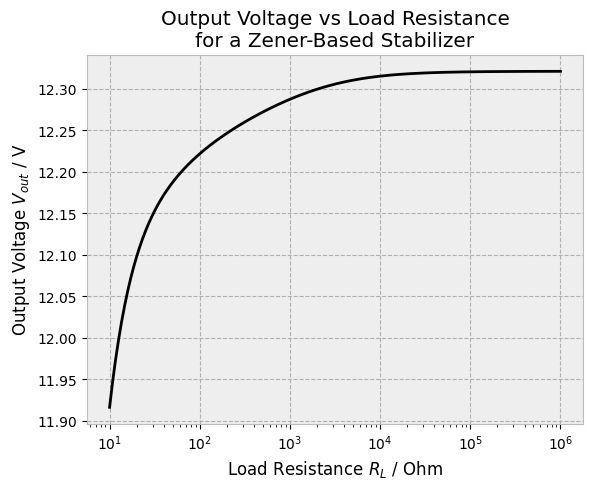

In [9]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title(
    "Output Voltage vs Load Resistance\n"
    "for a Zener-Based Stabilizer"
)

# Load curve
plt.plot(R_out, np.array(data), "black", linewidth=2)

# Logarithmic scale for the load resistance
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Output Voltage $V_{out}$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

This time, it can be observed that the system is much more sensitive to the load resistance. As soon as the resistance decreases, the output voltage drops significantly. This effect occurs because transistor ($Q_1$) becomes saturated and can no longer supply enough current to maintain the output voltage. Therefore, it is essential to have a relatively high load resistance for proper operation.

In [10]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Regulateur')

# Include required component libraries
circuit.include("lib/bjt.lib")
circuit.include("lib/zener.lib")
circuit.include('lib/UA741.sub')

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
V_in = 20 @ u_V                    # Input supply voltage [V]

circuit.V('in', 'collecteur', circuit.gnd, V_in)

# ------------------------------------------------------------
# Polarization tension
# ------------------------------------------------------------
V_polarization = 15
circuit.V('cc', 'VCC', circuit.gnd,   V_polarization@u_V)
circuit.V('ee', 'VEE', circuit.gnd, - V_polarization@u_V)

# ------------------------------------------------------------
# Initialisation resistance
# ------------------------------------------------------------
R_1 = 1.0 @ u_kOhm             # R1 [Ω]
R_2 = 1.5 @ u_kOhm             # R2 [Ω]
R_3 = 4.7 @ u_kOhm             # R3 [Ω]

circuit.R(3, 'collecteur',   'v+', R_3)
circuit.R(2, 'emetteur',     'v-', R_2)
circuit.R(1, 'v-',    circuit.gnd, R_1)

# ------------------------------------------------------------
# Initialisation resistance courant
# ------------------------------------------------------------
circuit.R1.minus.add_current_probe(circuit)
circuit.R2.minus.add_current_probe(circuit)
circuit.R3.minus.add_current_probe(circuit)


# ------------------------------------------------------------
# Initialisation zener diode
# ---------------------------------------------------------
# Zener diode for base voltage stabilization
circuit.D("Z", circuit.gnd, 'v+', model='DZENER')
circuit.DZ.plus.add_current_probe(circuit)

# ------------------------------------------------------------
# Transistor Stage
# ------------------------------------------------------------
# BJT(name, collector, base, emitter, model)
circuit.BJT(1, 'collecteur', 'base', 'emetteur', model='2N2222A')
circuit.X('U1', 'UA741', 'v+', 'v-', 'VCC', 'VEE', 'base')

circuit.Q1.collector.add_current_probe(circuit)

# ------------------------------------------------------------
# Emitter Load
# ------------------------------------------------------------
R_emitter = Rout @ u_Ohm           # Emitter resistor [Ω]
# Résistance variable dans le temps (820 → 300 Ω à t = 0.5 s)
circuit.R('l', 'emetteur', circuit.gnd, 'r = {820 - 520*u(time-0.003)}');
circuit.Rl.minus.add_current_probe(circuit)

# ============================================================
# End of Circuit Definition
# ============================================================

# Simulation 1 seconde
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=0.0001@u_ms, end_time=10@u_ms)

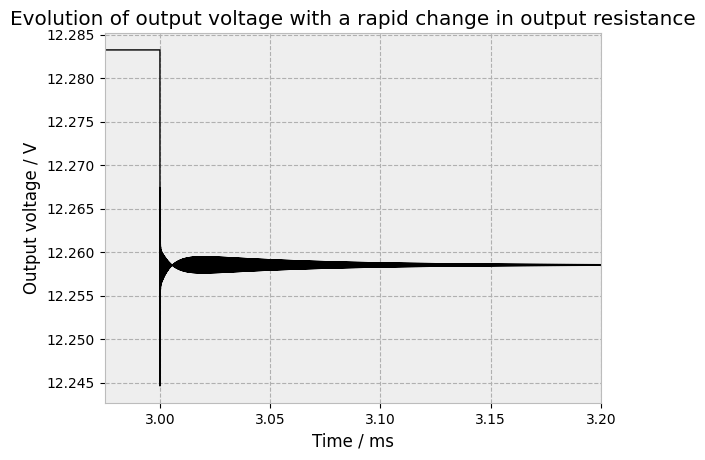

In [11]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Evolution of output voltage with a rapid change in output resistance")

# output voltage vs load resistance
plt.plot(analysis.time*1e3, analysis.nodes["emetteur"], "black", lw=1)

# Axis labels
plt.ylabel("Output voltage / V")
plt.xlabel("Time / s")
plt.xlabel("Time / ms")
plt.xlim(2.975, 3.2)

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It is possible to observe the rapid evolution of the voltage in the circuit. Note that this is not fully representative of real conditions, as the load resistance is changed abruptly from 820 Ω to 300 Ω. However, it clearly demonstrates the operation of the feedback loop.

```{note}
It is possible to estimate the stabilization time.
```

### Evolution of the Power Dissipated in the Zener Diode

The objective is to examine how the power dissipated by the Zener diode varies as a function of the load resistance.

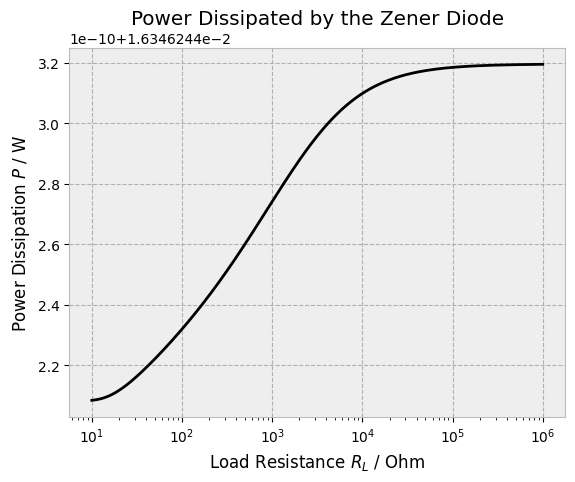

In [12]:
# ============================================================
# Zener Diode Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Power Dissipated by the Zener Diode")

# Power vs load resistance (converted to mW)
plt.plot(R_out, np.array(diode), "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Power Dissipation $P$ / W")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can be observed that the power dissipated by the Zener diode is very low. This is because the operational amplifier protects the Zener diode, preventing it from being exposed to excessive power. As a result, there is no longer any concern about the Zener diode being damaged by power dissipation. Therefore, if your regulator is frequently connected and disconnected, this system is a more suitable choice.

### Evolution of the Power Dissipated in Transistor $Q_1$ as a Function of the Load Resistance

The objective is to examine how the power dissipated in the transistor changes as the load resistance is varied.

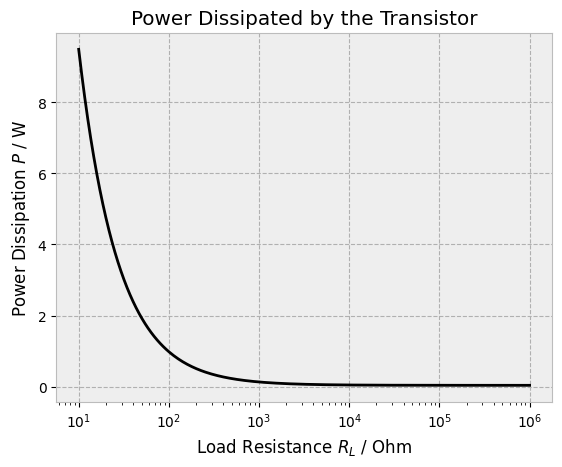

In [13]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Power Dissipated by the Transistor")

# Power vs load resistance
plt.plot(R_out, np.array(puissanceQ1), "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Power Dissipation $P$ / W")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can be observed that the power dissipated in the transistor is not constant as a function of the load resistance. When the load resistance is high, the power dissipated by the transistor is relatively low. However, as the load resistance decreases, the power dissipation increases significantly, following an approximately exponential trend. In the following sections, the goal will be to reduce this effect.

### Voltage as a Function of Current

We can observe that the output current increases uncontrollably, which can lead to overvoltage conditions and potentially damage the transistor or any downstream components.

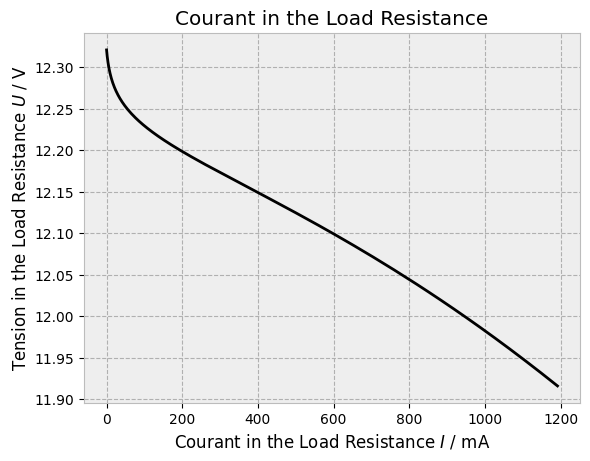

In [14]:
# ============================================================
# Courant de sortie
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(np.array(courant)*1e3, np.array(data), "black", linewidth=2)

# Axis labels
plt.xlabel("Courant in the Load Resistance $I$ / mA")
plt.ylabel("Tension in the Load Resistance $U$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

### For an Output Resistance Equal to 0

The goal here is to determine the maximum current that the transistor can deliver. To do so, the load resistance $R_L$ is set to $0 \ \ \Omega$, which corresponds to a short-circuit condition at the output.

In [15]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Regulateur')

# Include required component libraries
circuit.include("lib/bjt.lib")
circuit.include("lib/zener.lib")
circuit.include('lib/UA741.sub')

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
V_in = 20 @ u_V                    # Input supply voltage [V]

circuit.V('in', 'collecteur', circuit.gnd, V_in)

# ------------------------------------------------------------
# Polarization tension
# ------------------------------------------------------------
V_polarization = 15
circuit.V('cc', 'VCC', circuit.gnd,   V_polarization@u_V)
circuit.V('ee', 'VEE', circuit.gnd, - V_polarization@u_V)

# ------------------------------------------------------------
# Initialisation resistance
# ------------------------------------------------------------
R_1 = 1.0 @ u_kOhm             # R1 [Ω]
R_2 = 1.5 @ u_kOhm             # R2 [Ω]
R_3 = 4.7 @ u_kOhm             # R3 [Ω]

circuit.R(3, 'collecteur',   'v+', R_3)
circuit.R(2, 'emetteur',     'v-', R_2)
circuit.R(1, 'v-',    circuit.gnd, R_1)


# ------------------------------------------------------------
# Initialisation zener diode
# ---------------------------------------------------------
# Zener diode for base voltage stabilization
circuit.D("Z", circuit.gnd, 'v+', model='DZENER')

# ------------------------------------------------------------
# Transistor Stage
# ------------------------------------------------------------
# BJT(name, collector, base, emitter, model)
circuit.BJT(1, 'collecteur', 'base', 'emetteur', model='2N2222A')
circuit.X('U1', 'UA741', 'v+', 'v-', 'VCC', 'VEE', 'base')

circuit.Q1.collector.add_current_probe(circuit)

# ------------------------------------------------------------
# Emitter Load
# ------------------------------------------------------------
R_emitter = 0 @ u_Ohm           # Emitter resistor [Ω]

circuit.R('l', 'emetteur', circuit.gnd, R_emitter);
circuit.Rl.plus.add_current_probe(circuit)

# ============================================================
# End of Circuit Definition
# ============================================================

# ------------------------------------------------------------
# Simulator Initialization
# ------------------------------------------------------------
simulator = circuit.simulator(
    temperature=25,            # Simulation temperature [°C]
    nominal_temperature=25     # Nominal device temperature [°C]
)

# ------------------------------------------------------------
# Run Operating Point Simulation
# ------------------------------------------------------------
analysis = simulator.operating_point()

In [16]:
I_out_max = float(analysis.branches['vrl_plus'][0])
print(f"I_out_max = {I_out_max:.3f} A")

I_out_max = 1.476 A


In a short-circuit condition, the maximum output current is very high, with a value of $I_{\text{out max}} = 1.476 \ \text{A}$.

In the continuation of the chapter *Adding a Current Limiter*, the objective is to reduce the power dissipated when the load resistance becomes too low, thereby preventing damage to the transistor and, ultimately, to the entire electronic board.

## Adding a Current Limiter

This section is relatively short, but all the explanations and equations are almost identical to those for the stabilizer. For more information on the theoretical calculations and on how this kind of current limiter works, go here: [**Zener diode series stabilize**](./Diode_Zener)

### Electronics

In the schematic shown in [](#regulateur_tension_serie_AOP_limiteur_courant), you can see the electronic design of the regulator. The circuit includes two additional components—a resistor and a bipolar transistor—connected in parallel. These components are placed in series with the load resistor.

When the load resistance decreases, the current increases, which in turn increases the voltage across the current-limiting resistor. Once this voltage reaches approximately $\approx 0.7 \ \text{V}$, the transistor $Q_2$ begins to conduct. This action shunts current away from the base of the pass transistor $Q_1$, which mechanically reduces the current through the load resistor, thereby protecting the load from overcurrent.

```{note}
You can see in the schematic ([](#regulateur_tension_serie_AOP_limiteur_courant)) that there is a resistor $R_5$. The purpose of this resistor is to be part of the feedback loop; in our case, it is **not used**.
```


```{figure} ./images/regulateur_tension_serie_AOP_limiteur_courant.svg
:name: regulateur_tension_serie_AOP_limiteur_courant
:align: center
:width: 500px

Voltage Regulator with a Current Limiter
```

### Equation

The maximum current is given by:

$$I_{\max} = \frac{U_{BE}}{R_4}.$$

Another important point is that the system does not suffer from the voltage drop across $R_4$. As a result, the output voltage remains unchanged:

$$U_{\text{out}} = (R_1 + R_2), \frac{U_{\text{ref}}}{R_1}.$$


In the next section, we will examine how to implement this circuit in SPICE.

### SPICE Simulation

The corresponding SPICE implementation of the circuit is in the [](#regulateur_tension_serie_AOP_limiteur_courant_space):

```{figure} ./images/regulateur_tension_serie_AOP_limiteur_courant_space.svg
:name: regulateur_tension_serie_AOP_limiteur_courant_space
:align: center
:width: 500px

Voltage Regulator with a current limiter (SPICE)
```

In [17]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Output Resistance 
# ------------------------------------------------------------
start = -1
end   = 4
num   = 300
R_out = np.logspace(start, end, num)

data        = list()   # correspond à la tension de sortie
puissanceQ1 = list()   # correspond à la puissance absorbé par le transistor
diode       = list()   # correspond à la puissance absorbé par la diode zener
courant     = list()

for Rout in R_out :
    # ------------------------------------------------------------
    # Circuit Initialization
    # ------------------------------------------------------------
    circuit = Circuit('Montage Regulateur')
    
    # Include required component libraries
    circuit.include("lib/bjt.lib")
    circuit.include("lib/zener.lib")
    circuit.include('lib/UA741.sub')
    
    # ------------------------------------------------------------
    # Input Supply
    # ------------------------------------------------------------
    V_in = 20 @ u_V                    # Input supply voltage [V]
    
    circuit.V('in', 'collecteur', circuit.gnd, V_in)
    
    # ------------------------------------------------------------
    # Polarization tension
    # ------------------------------------------------------------
    V_polarization = 15
    circuit.V('cc', 'VCC', circuit.gnd,   V_polarization@u_V)
    circuit.V('ee', 'VEE', circuit.gnd, - V_polarization@u_V)
    
    # ------------------------------------------------------------
    # Initialisation resistance
    # ------------------------------------------------------------
    R_1 = 1.0 @ u_kOhm             # R1 [Ω]
    R_2 = 1.5 @ u_kOhm             # R2 [Ω]
    R_3 = 4.7 @ u_kOhm             # R3 [Ω]
    
    circuit.R(3, 'collecteur',   'v+', R_3)
    circuit.R(2, 'emetteur',     'v-', R_2)
    circuit.R(1, 'v-',    circuit.gnd, R_1)
    
    # ------------------------------------------------------------
    # Initialisation resistance courant
    # ------------------------------------------------------------
    circuit.R1.minus.add_current_probe(circuit)
    circuit.R2.minus.add_current_probe(circuit)
    circuit.R3.minus.add_current_probe(circuit)
    
    
    # ------------------------------------------------------------
    # Initialisation zener diode
    # ---------------------------------------------------------
    # Zener diode for base voltage stabilization
    circuit.D("Z", circuit.gnd, 'v+', model='DZENER')
    circuit.DZ.plus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Transistor Stage
    # ------------------------------------------------------------
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(1, 'collecteur', 'base', 'emetteur', model='2N2222A')
    circuit.X('U1', 'UA741', 'v+', 'v-', 'VCC', 'VEE', 'base')
    
    circuit.Q1.collector.add_current_probe(circuit)

    # ------------------------------------------------------------
    # Courant Limitor
    # ------------------------------------------------------------
    R_2 = 3.3 @ u_Ohm               # Base resistor [Ω]
    
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(2, 'base', 'emetteur', 'out', model='2N2222A')
    circuit.R(4, "emetteur", "out", R_2)
    
    # ------------------------------------------------------------
    # Emitter Load
    # ------------------------------------------------------------
    R_emitter = Rout @ u_Ohm           # Emitter resistor [Ω]
    
    circuit.R('l', 'out', circuit.gnd, R_emitter);
    circuit.Rl.plus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Simulator Initialization
    # ------------------------------------------------------------
    simulator = circuit.simulator(
        temperature=25,            # Simulation temperature [°C]
        nominal_temperature=25     # Nominal device temperature [°C]
    )

    # ------------------------------------------------------------
    # Run Operating Point Simulation
    # ------------------------------------------------------------
    analysis = simulator.operating_point()
    
    # ------------------------------------------------------------
    # Save data
    # ------------------------------------------------------------
    courant.append(float(analysis.branches["vrl_plus"][0]))
    data.append(analysis.nodes['out'])
    puissanceQ1.append(calcul_puissance(analysis))

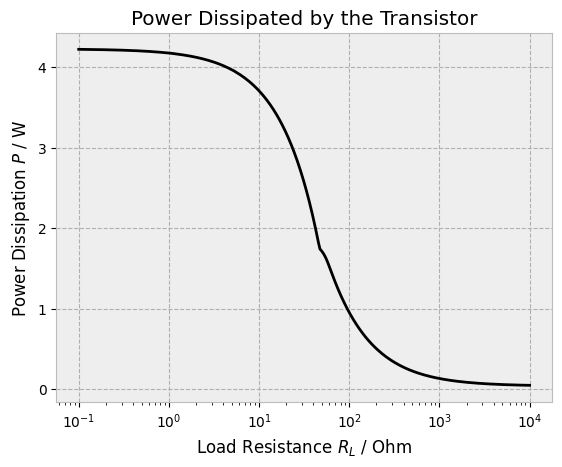

In [18]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Power Dissipated by the Transistor")

# Power vs load resistance
plt.plot(R_out, np.array(puissanceQ1), "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Power Dissipation $P$ / W")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

In this graph, one might wonder what the current limiter actually accomplishes, since the power dissipated by the transistor still increases. However, unlike the configuration without the current limiter, we can now observe the beginning of a power-limiting effect. The limiter does not completely prevent the power from rising, but it significantly slows down its increase once the current approaches the imposed limit.

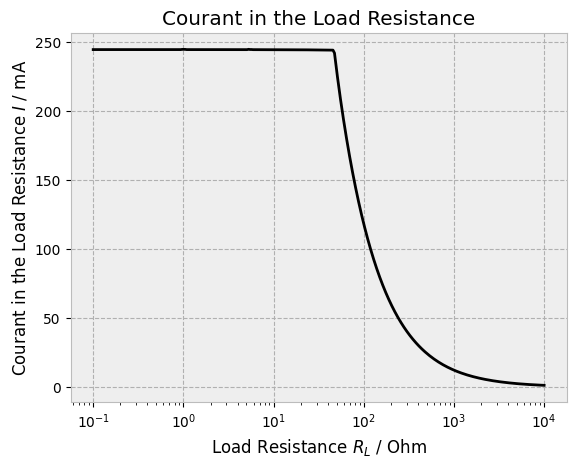

In [19]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(R_out, np.array(courant)*1e3, "black", linewidth=2)

# Logarithmic scale on the load axis
plt.xscale("log")

# Axis labels
plt.xlabel("Load Resistance $R_L$ / Ohm")
plt.ylabel("Courant in the Load Resistance $I$ / mA")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can be seen that the current through the load resistor saturates, which provides protection against overcurrent conditions.

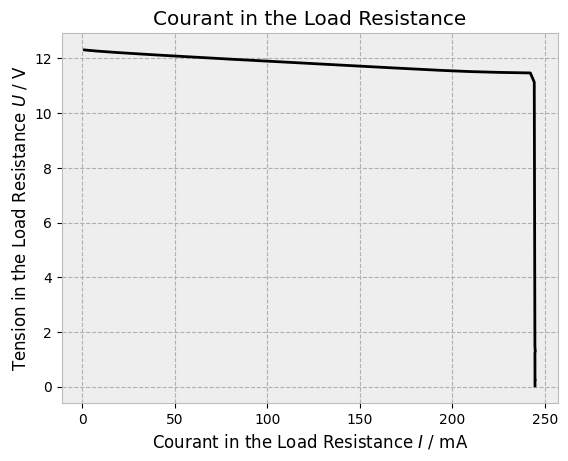

In [20]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(np.array(courant)*1e3, np.array(data), "black", linewidth=2)

# Axis labels
plt.xlabel("Courant in the Load Resistance $I$ / mA")
plt.ylabel("Tension in the Load Resistance $U$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

This graph is, in my opinion, the most representative one. As soon as the current exceeds a certain threshold, the output voltage drops sharply. This abrupt decrease clearly demonstrates the effectiveness of the current limiter and highlights its importance in protecting the circuit.

In [21]:
## Courant de sortie en court circuit 

L'objectif est de voir le courant de sortie 

SyntaxError: unterminated string literal (detected at line 3) (3083288120.py, line 3)

## Improving the Current Limiter by Current Feedback

We can see that adding the current limiter already improves the behavior of the circuit. However, the output current still remains relatively high. In the previous circuit, the maximum current is determined by the transistor’s junction voltage $U_{BE1}$, divided by the resistor $R_4$.

The maximum current is therefore:

$$I_{\max} = \frac{U_{BE1}}{R_4} = \frac{0.7}{3.3} \approx 212 \ \text{mA}.$$

It is observed that even in the event of an output short circuit, the current remains relatively high. The following section aims to improve the current limiter in order to further reduce the maximum output current and ensure more effective protection.

### Electronic Circuit

The electronic circuit is shown in [](#regulateur_tension_serie_AOP_limiteur_courant_2). We can observe that the two current limiters are very similar: both use a transistor and a resistor in parallel, placed in series with the load resistor.

However, in this version two additional resistors, $R_5$ and $R_6$, are added in a voltage divider configuration. This time, the base of transistor $Q_2$ is **not** connected directly to the input of the resistor network; instead, it is connected to the midpoint between $R_5$ and $R_6$.

```{figure} ./images/regulateur_tension_serie_AOP_limiteur_courant_2.svg
:name: regulateur_tension_serie_AOP_limiteur_courant_2
:align: center
:width: 500px

Voltage Regulator with a Current Limiter 2
```

In the next section, we will derive the circuit equations.

### Circuit Equations

The current equations for the system are as follows.

For the maximum output current:

$$
I_{\text{out,max}} =
\frac{(U_{BE2} + U_{\text{out}})\cdot \frac{R_5}{R_6} + U_{BE2}}{R_4}
$$

For the short-circuit current:

$$
I_{\text{cc}} =
\frac{U_{BE2}\cdot \frac{R_5}{R_6} + U_{BE2}}{R_4}
$$

### Demonstration

In this demonstration, the goal is not to analyze the entire circuit but rather to focus specifically on the equations governing the current limiter. To make the derivation easier to follow, the schematic in
[](#regulateur_tension_serie_AOP_limiteur_courant_2_demonstration) is provided.

```{figure} ./images/regulateur_tension_serie_AOP_limiteur_courant_2_demonstration.svg
:name: regulateur_tension_serie_AOP_limiteur_courant_2_demonstration
:align: center
:width: 500px

Voltage Regulator with a Current Limiter 2 (demonstration)
```

We begin by calculating the maximum output current, which corresponds to the condition $R_L = 0$. In this case:

$$
I_{\text{out max}} = \frac{U_{R4 \ \text{max}}}{R_4 + R_L}
$$

Since $R_L = 0$, this simplifies to:

$$
I_{\text{cc}} = \frac{U_{R4 \ \text{max}}}{R_4}
$$

However, the voltage $U_{R4}$ is not yet known. To determine it, we examine the loop containing $R_4$, $R_5$, and the base–emitter junction of transistor $Q_2$. This gives:

$$
U_{R4} = U_{R5} + U_{BE2}
$$

Next, we can determine the voltage across resistor $R_6$ using the other loop:

$$
U_{R6} = U_{BE2} + U_{out}
$$

We now express the voltage across $R_5$ using Ohm’s law:

$$
U_{R5} = R_5 \cdot I_{R5}
$$

To find $I_{R5}$, we use the node equation:

$$
I_{R5} = I_{R6} + I_{B2}
$$

Since $I_{R6} \gg I_{B2}$, we can assume:

$$
I_{R5} \approx I_{R6}
$$

This approximation allows us to ignore the base current $I_{B2}$, which is negligible compared to the current flowing through $R_6$.

Therefore, we can write:

$$
U_{R5} = R_5 \cdot I_{R6}
$$

From Ohm’s law, the current through $R_6$ is:

$$
I_{R6} = \frac{U_{R6}}{R_6}
$$

Since $U_{R6} = U_{BE2} + U_{out}$, the final expression becomes:

$$
I_{R6} = \frac{U_{BE2} + U_{out}}{R_6}
$$

Thus, we can write:

$$
U_{R5} = R_5 \cdot \frac{U_{BE2} + U_{out}}{R_6}
$$

Now, starting again from the equation

$$
U_{R4} = U_{R5} + U_{BE2},
$$

we substitute the expression of $U_{R5}$, which gives:

$$
U_{R4} = (U_{BE2} + U_{out}) \cdot \frac{R_5}{R_6} + U_{BE2}
$$

Finally, to obtain the output current $I_{\text{out max}}$, we use Ohm’s law applied to $R_4$:

$$
I_{\text{out max}} = \frac{U_{R4\ \text{max}}}{R_4}
$$

which leads to:

$$
I_{\text{out max}} = \frac{(U_{BE2} + U_{out}) \cdot \frac{R_5}{R_6} + U_{BE2}}{R_4}
$$

Now we can write the expression for the short-circuit case.

The short-circuit conditions are:

* $R_L = 0\ \Omega$
* $U_{out} = 0\ \text{V}$

Substituting these values into the previous equation yields:

$$I_{\text{cc}} = \frac{(U_{BE2} + 0)\cdot \frac{R_5}{R_6} + U_{BE2}}{R_4}$$
$$I_{\text{cc}} = \frac{U_{BE2}\cdot \frac{R_5}{R_6} + U_{BE2}}{R_4}$$
$$I_{\text{cc}} = \frac{(U_{BE2})\cdot (1 + \frac{R_5}{R_6})}{R_4}$$

### SPICE Simulation

The corresponding SPICE implementation of the circuit is in the [](#regulateur_tension_serie_AOP_limiteur_courant_2_space):

```{figure} ./images/regulateur_tension_serie_AOP_limiteur_courant_2_space.svg
:name: regulateur_tension_serie_AOP_limiteur_courant_2_space
:align: center
:width: 500px

Voltage Regulator with a current limiter (SPICE)
```

In [ ]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Output Resistance 
# ------------------------------------------------------------
start = -2
end   = 2
num   = 300
R_out = np.logspace(start, end, num)
R_out[0] = 0

data        = list()   # correspond à la tension de sortie
puissanceQ1 = list()   # correspond à la puissance absorbé par le transistor
diode       = list()   # correspond à la puissance absorbé par la diode zener
courant     = list()

for Rout in R_out :
    # ------------------------------------------------------------
    # Circuit Initialization
    # ------------------------------------------------------------
    circuit = Circuit('Montage Regulateur')
    
    # Include required component libraries
    circuit.include("lib/bjt.lib")
    circuit.include("lib/zener.lib")
    circuit.include('lib/UA741.sub')
    
    # ------------------------------------------------------------
    # Input Supply
    # ------------------------------------------------------------
    V_in = 20 @ u_V                    # Input supply voltage [V]
    
    circuit.V('in', 'collecteur', circuit.gnd, V_in)
    
    # ------------------------------------------------------------
    # Polarization tension
    # ------------------------------------------------------------
    V_polarization = 15
    circuit.V('cc', 'VCC', circuit.gnd,   V_polarization@u_V)
    circuit.V('ee', 'VEE', circuit.gnd, - V_polarization@u_V)
    
    # ------------------------------------------------------------
    # Initialisation resistance
    # ------------------------------------------------------------
    R_1 = 1.0 @ u_kOhm             # R1 [Ω]
    R_2 = 1.5 @ u_kOhm             # R2 [Ω]
    R_3 = 4.7 @ u_kOhm             # R3 [Ω]
    
    circuit.R(3, 'collecteur',   'v+', R_3)
    circuit.R(2, 'emetteur',     'v-', R_2)
    circuit.R(1, 'v-',    circuit.gnd, R_1)
    
    # ------------------------------------------------------------
    # Initialisation resistance courant
    # ------------------------------------------------------------
    circuit.R1.minus.add_current_probe(circuit)
    circuit.R2.minus.add_current_probe(circuit)
    circuit.R3.minus.add_current_probe(circuit)
    
    
    # ------------------------------------------------------------
    # Initialisation zener diode
    # ---------------------------------------------------------
    # Zener diode for base voltage stabilization
    circuit.D("Z", circuit.gnd, 'v+', model='DZENER')
    circuit.DZ.plus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Transistor Stage
    # ------------------------------------------------------------
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(1, 'collecteur', 'base', 'emetteur', model='2N2222A')
    circuit.X('U1', 'UA741', 'v+', 'v-', 'VCC', 'VEE', 'base')
    
    circuit.Q1.collector.add_current_probe(circuit)

    # ------------------------------------------------------------
    # Courant Limitor
    # ------------------------------------------------------------
    R_4 = 3.3 @ u_Ohm               # Base resistor [Ω]
    R_5 = 1.0 @ u_kOhm               # Base resistor [Ω]
    R_6 = 1.1 @ u_kOhm               # Base resistor [Ω]
    
    # BJT(name, collector, base, emitter, model)
    circuit.BJT(2, 'base', 'base2', 'out', model='2N2222A')
    circuit.R(4, "emetteur", "out", R_4)
    circuit.R(5, "emetteur", "base2", R_5)
    circuit.R(6, "emetteur", circuit.gnd, R_6)
    
    # ------------------------------------------------------------
    # Emitter Load
    # ------------------------------------------------------------
    R_emitter = Rout @ u_Ohm           # Emitter resistor [Ω]
    
    circuit.R('l', 'out', circuit.gnd, R_emitter);
    circuit.Rl.plus.add_current_probe(circuit)
    
    # ------------------------------------------------------------
    # Simulator Initialization
    # ------------------------------------------------------------
    simulator = circuit.simulator(
        temperature=25,            # Simulation temperature [°C]
        nominal_temperature=25     # Nominal device temperature [°C]
    )

    # ------------------------------------------------------------
    # Run Operating Point Simulation
    # ------------------------------------------------------------
    analysis = simulator.operating_point()
    
    # ------------------------------------------------------------
    # Save data
    # ------------------------------------------------------------
    courant.append(float(analysis.branches["vrl_plus"][0]))
    data.append(analysis.nodes['out'])
    puissanceQ1.append(calcul_puissance(analysis))

In [ ]:
# ============================================================
# Transistor Power Dissipation Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Courant in the Load Resistance")

# Power vs load resistance
plt.plot(np.array(courant)*1e3, np.array(data), "black", linewidth=2)

# Axis labels
plt.xlabel("Courant in the Load Resistance $I$ / mA")
plt.ylabel("Tension in the Load Resistance $U$ / V")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can be seen that this new current limiter does not perform as well as expected. There may be an error in the code.

### Calcul théorique

$$
I_{\text{out,max}} =
\frac{(U_{BE2} + U_{\text{out}})\cdot \frac{R_5}{R_6} + U_{BE2}}{R_4}
$$

For the short-circuit current:

$$
I_{\text{cc}} =
\frac{U_{BE2}\cdot \frac{R_5}{R_6} + U_{BE2}}{R_4}
$$

In [ ]:
R4 = 3.3
R5 = 1.0e3
R6 = 1.1e3
U_BE2 = 0.7
U_out = 12.3

In [ ]:
Iout = ((U_BE2 + U_out) * (R5/R6) + U_BE2)/(R4)
Icc  = ((U_BE2) * (R5/R6) + U_BE2)/(R4)

print(f"Courant de sortie maximum {Iout:.2f} A")
print(f"Courant de sortie en court-circuit {Icc*1e3:.1f} mA")

## Reference 

**Another notebook to better understand this notebook**
* [*Cour sur les composant bipolaire*](../../Base_componant/transistor/Bipolaire)
* [*Cour sur les diodes*](../../Base_componant/diode/Diode)

**Youtube**
* [*ELAN - Régulateur de tension (partie 3 - régulateur série à AOP)*](https://www.youtube.com/watch?v=f2eUrpCn1zM&list=PL1VxGOb3XYh1QD4sxYYAMfiksop7V4v1E&index=10)
* [*ELAN - Régulateur de tension (partie 4 - Limitation du courant de sortie)*](https://www.youtube.com/watch?v=5KkIeKmW1mQ&list=PL1VxGOb3XYh1QD4sxYYAMfiksop7V4v1E&index=9&pp=iAQB)
* [*ELAN - Régulateur de tension (partie 5 - Limitation par retour de courant)*](https://www.youtube.com/watch?v=h6F0UlgQDyE&list=PL1VxGOb3XYh1QD4sxYYAMfiksop7V4v1E&index=8)

## Writing Matrix

| Author | Reviewer | Approver | Section | Date 1 | Date 2 | Date 3 | General Remarks |
|--------|----------|----------|---------|--------|--------|--------|------------------|
| Sacha  | /        | /        | Entire document | 2026-01-01 | / | / | Initial draft of the full document |
